# MPSLIB in Google Colab
This is a simple example of running MPSLIB online in Google Colab

## INSTALL MPSLIB (simple) (only needed once on google colab)

In [9]:
module_name='mpslib'
try:
    __import__(module_name)
    print('%s allready installed. skipping installation.' % module_name)
        
except ImportError:
    print('%s cannot be loaded. trying to install it.' % module_name)
    !curl -O https://raw.githubusercontent.com/ergosimulation/mpslib/master/install_latest_mpslib.sh
    !sh ./install_latest_mpslib.sh
        

mpslib allready installed. skipping installation.


# MPSLIB IN PYTHON

In [0]:
import mpslib as mps
import numpy as np
import matplotlib.pyplot as plt


### Load a training image

In [6]:
TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
#TI, TI_filename = mps.trainingimages.checkerboard2()
#TI, TI_filename = mps.trainingimages.rot90()

plt.imshow(TI[:,:,0].T)
#mps.trainingimages.ti_plot_all()


AttributeError: ignored

### Setup msplib

In [4]:
O = mps.mpslib(method='mps_snesim_tree',
                    verbose_level=-1, debug_level=-1)
#O = mps.mpslib(method='mps_genesim')
O.parameter_filename = 'mps.txt'
O.par['n_real']=9
O.par['n_cond']=36
O.par['template_size']=np.array([[10,5],[10,5],[1,1]])
O.par['origin']=np.array([0,0,0])
O.par['simulation_grid_size']=np.array([40,20,1])

# hard data
O.d_hard = np.array([[ 10, 5, 0, 1],
                       [ 30, 15, 0, 0]])

# soft data
O.d_soft = np.array([[ 10, 15, 0, 0.9, 0.1],
                       [ 30, 5, 0, 0.9, 0.1]])


# show parameter setting
O.par


AttributeError: ignored

###Run MPSLIB

In [0]:
O.ti = TI
O.run_parallel()
#O.run()


parallel: using 2 threads to simulate 9 realizations
parallel: with up to 5 relizations per thread
parallel: Using 2 of max 2 threads
__name__ = mpslib.mpslib
Thread:000, nr=5
Thread:001, nr=4
parallel job done. Collecting data from threads
parallel: collected 9 realizations


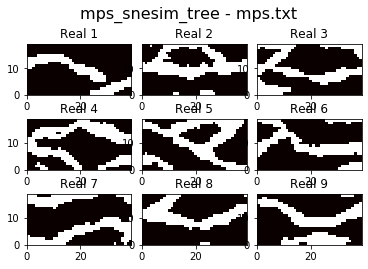

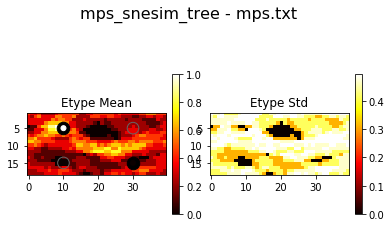

In [0]:
O.plot_reals()
O.plot_etype()